# Step 0: Import libraries.

In [1]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("stopwords")

# nltk library docs: https://www.nltk.org/install.html

[nltk_data] Downloading package punkt to /home/PMU004/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/PMU004/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Step 1: Read and prepare the text.

* We have to open the text file we are working with to prepare it for further analysis.

In [2]:
file = open("meditations_marcus_aurelius.txt", encoding = "UTF-8")
raw_meditations = file.read().lower() # Lowercase all the text for better analysis.

* Using nltk functions we process the text for further analysis.

In [3]:
tokenizer = RegexpTokenizer(r'\w+') # With this regex we can omit punctuation.
tokens_meditations = tokenizer.tokenize(raw_meditations) # Separate text into tokens (words).
stop_words = set(stopwords.words("english")) # Language of the stopwords we want to omit.

words_filtered = []

for w in tokens_meditations:
    if w not in stop_words:
        words_filtered.append(w)
        
text_meditations = nltk.Text(words_filtered) # Searchable version of the text.


# Step 2: Analysis of the text. 

In [4]:
# How many words the filtered text has.
len(text_meditations)

34112

In [5]:
# How many times the word desired appears on the text.(case-sensitive)
text_meditations.count("virtue")

30

In [6]:
# Frequency of appearance
freq_dist = nltk.FreqDist(text_meditations)
freq_dist.most_common(20) # Most common 20 words.

[('thou', 821),
 ('things', 552),
 ('unto', 439),
 ('man', 368),
 ('thy', 347),
 ('one', 336),
 ('thee', 312),
 ('nature', 273),
 ('doth', 253),
 ('either', 239),
 ('good', 216),
 ('thyself', 197),
 ('must', 193),
 ('also', 172),
 ('whatsoever', 172),
 ('life', 166),
 ('shall', 163),
 ('world', 160),
 ('upon', 152),
 ('mind', 150)]

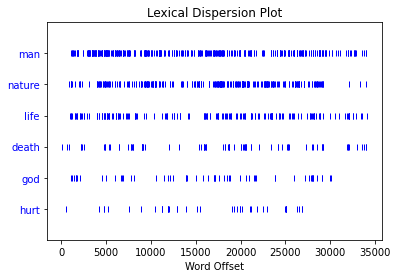

In [7]:
# A dispersion plot to visualize the frequency of appearance.
text_meditations.dispersion_plot(["man", "nature", "life", "death", "god", "hurt"])

In [8]:
# Text collocations
text_meditations.collocation_list()

[('thou', 'art'),
 ('thou', 'shalt'),
 ('unto', 'thee'),
 ('thou', 'hast'),
 ('thou', 'dost'),
 ('thy', 'mind'),
 ('thou', 'must'),
 ('must', 'needs'),
 ('thou', 'mayest'),
 ('according', 'nature'),
 ('thou', 'doest'),
 ('nature', 'universe'),
 ('one', 'another'),
 ('happen', 'unto'),
 ('marcus', 'aurelius'),
 ('thou', 'wilt'),
 ('antoninus', 'pius'),
 ('every', 'one'),
 ('doth', 'happen'),
 ('reasonable', 'creatures')]

In [9]:
# The lines where the word searched appears.
# Gives insight of the context.
text_meditations.concordance("man")

Displaying 25 of 368 matches:
ations legends myths allegorical soul man thus emanation godhead eventually abs
together good good whole highest good man consciously work god common good sens
 rules universe virtue soul must rule man logic stoic system noteworthy theory 
rely sphere virtue may act ideal wise man sufficient unto things αὐταρκής knowi
upon rack probable stoic claimed wise man strove ideal much christian strives l
oint strong insistence unity universe man duty part great whole public spirit s
_imitation christ_ ideal self control man task says _imitation_ overcome every 
a meet us _meditations_ alike realise man one great community man sufficient sa
alike realise man one great community man sufficient says christian must bear t
e upon earth says christian evil days man life passeth away suddenly shadow one
 serve divine spirit implanted within man must keep pure violent passion evil a
ourtesy consideration aims whatsoever man either doth saith thou must good doth
either dot

In [10]:
# Similar words to the one analysed.
text_meditations.similar("man")

thee good world little nature universe thyself things men life god bad
wise another doth way doest first body one


In [11]:
# Most common words used with the words from the list.
text_meditations.common_contexts(['man', 'nature'])
text_meditations.common_contexts(["life", "death"])
text_meditations.common_contexts(["god", "hurt"])

man_doth constitution_man man_man
things_nothing
No common contexts were found


In [12]:
# A .txt file created with filtered text
with open('filtered_meditations.txt', 'w') as f:
    for line in text_meditations:
        f.write(f"{line} ")
        
# with the new .txt file we can make a wordcloud for more visual appealing visualization of the frequency of the words used.

![MARCOAURELIUS](marco_wordcloud.png)